# **Data Analytics : Exercises**
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2024-07-14
---

Reference: https://www.kaggle.com/datasets/carrie1/ecommerce-data

**ความหมายแต่ละคอลัมน์**

* **⁠InvoiceNo**: คือ หมายเลขใบเสร็จ (invoice number)
* **StockCode**: คือ รหัสสินค้า (code number of a product item)
* **Description**: คือ ชื่อสินค้า (description of a product item)
* **Quantity**: คือ จำนวนสินค้านั้นที่ซื้อในใบเสร็จ (number of each product item in an invoice)
* **InvoiceDate**: คือ วันที่/เวลา ของใบเสนอราคา
* **UnitPrice**: คือ ราคาสินค้าต่อชิ้น (price per unit)
* **CustomerID**: คือ รหัสลูกค้า
* **Country**: คือ ประเทศของลูกค้า



---



## Import

In [1]:
import numpy as np
import pandas as pd

## Examples
ตัวอย่างสำหรับเริ่มต้น

In [2]:
CSV_PATH = "https://rathachai.github.io/DA-LAB/datasets/ecom-dat.csv"

In [3]:
df = pd.read_csv(CSV_PATH)

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom
...,...,...,...,...,...,...,...,...
46850,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom
46851,581581,23561,SET OF 6 RIBBONS PARTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom
46852,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,12/9/2011 12:20,1.65,17581.0,United Kingdom
46853,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,12/9/2011 12:21,2.08,17581.0,United Kingdom


In [5]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85


---
### (Ex-01) จงหาลูกค้าที่ซื้อสินค้าบ่อยที่สุด 5 คนแรก

Find top-5 most-frequence buyers.

In [7]:
dfg = df.groupby(['CustomerID'])[['InvoiceNo']].nunique().sort_values('InvoiceNo', ascending=False)
dfg.head(5)

,InvoiceNo
CustomerID,
14911.0,197
14606.0,93
13408.0,60
13767.0,37
16133.0,32


---
### (Ex-02) จงหาความถี่การใช้จ่ายตามรายชั่วโมง

Find the number of invoices in each hour.

In [8]:
df['InvDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00


In [9]:
df['hr'] = df['InvDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate,hr
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00,9
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00,9
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00,9


In [10]:
df_by_hr = df.groupby('hr')[['InvoiceNo']].nunique()
df_by_hr

,InvoiceNo
hr,
7,2
8,59
9,180
10,291
11,262
12,354
13,307
14,264
15,212


<Axes: xlabel='hr'>

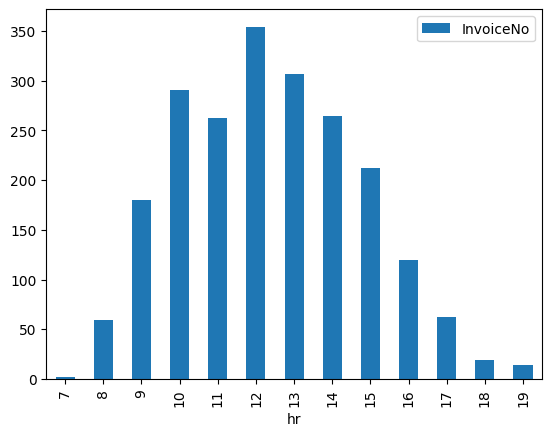

In [11]:
df_by_hr.plot.bar()



---



---


## Basic Exercises
โจทย์อย่างง่าย

### (B-01) จงนับจำนวน Invoice

To count the number of invoices.

2146

In [12]:
df["InvoiceNo"].nunique()

2146

---
### (B-02) จงนับจำนวนลูกค้า

To count the number of customers.

486

In [13]:
df["CustomerID"].nunique()

486

---
### (B-03) จงนับจำนวนสินค้า

To count the number of product items.

hint
- description

3202

In [17]:
df["Description"].nunique(), df["StockCode"].nunique()

(3202, 3092)

---
### (B-04) มีประเทศใดบ้าง

List all countries.

array(['United Kingdom', 'Germany', 'EIRE', 'Japan', 'France',
       'Channel Islands', 'Denmark', 'Cyprus', 'Austria', 'Switzerland',
       'United Arab Emirates', 'Czech Republic', 'Spain', 'Italy',
       'European Community', 'Canada', 'Finland', 'Norway', 'Portugal'],
      dtype=object)

In [19]:
df["Country"].unique(), df["Country"].nunique()

(array(['United Kingdom', 'Germany', 'EIRE', 'Japan', 'France',
        'Channel Islands', 'Denmark', 'Cyprus', 'Austria', 'Switzerland',
        'United Arab Emirates', 'Czech Republic', 'Spain', 'Italy',
        'European Community', 'Canada', 'Finland', 'Norway', 'Portugal'],
       dtype=object),
 19)

---
### (B-05) จงคำนวณจำนวนรายได้ทั้งหมด


To find total revenue.

753421.941

In [30]:
df["Total"].sum()

np.float64(753421.941)

---
### (B-06) จงหาค่าใช้จ่ายเฉลี่ยต่อการซื้อ


To find average revenue of each invoice.

np.float64(351.08198555452003)

In [29]:
df.groupby('InvoiceNo')['Total'].sum().mean()

np.float64(351.08198555452003)

---
### (B-07) จงหาค่าใช้จ่ายเฉลี่ยต่อลูกค้า


To find average expense of each customer.

1550.2509074074073

In [31]:
df.groupby('CustomerID')['Total'].sum().mean()

np.float64(1550.2509074074073)



---



---


## Advanced Exercises

โจทย์ยากขึ้น

### (Q-01) ลูกค้าจากประเทศใดมีการใช้จ่ายสูงที่สุด

Which country has the most expense?


hint:
- groupby country
- sum total
- เรียงจากมากไปน้อย (order from max to min)
- เลือกแถวแรก (select the first row)

,Total
Country,
United Kingdom,540707.491


In [34]:
df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(1)

,Total
Country,
United Kingdom,540707.491


---
### (Q-02) Invoice ใด มีจำนวนชิ้นสินค้าสูงที่สุด

Which invoice has the most number of quantity?

,Quantity
InvoiceNo,
567183,2673


In [35]:
df.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending=False).head()

,Quantity
InvoiceNo,
567183,2673
541518,1926
551014,1703
547063,1703
552013,1651


---
### (Q-03) Invoice ใด มีค่าใช้จ่ายสูงที่สุด

Which inovice has the most expense?

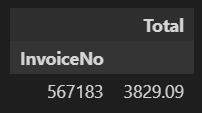

In [37]:
df.groupby('InvoiceNo')['Total'].sum().sort_values(ascending=False).head(1)

,Total
InvoiceNo,
567183,3829.09


---
### (Q-04) Invoice ใด มีชนิดสินค้ามากที่สุด

Which invoice has the most number of product item?

hint
- nunique

,Description
InvoiceNo,
567183,385


In [38]:
df.groupby('InvoiceNo')['Description'].nunique().sort_values(ascending=False).head(1)

,Description
InvoiceNo,
567183,385


---
### (Q-05) ลูกค้าใดซื้อสินค้าบ่อยที่สุด

Who is the top most-frequence buyer?

,InvoiceNo
CustomerID,
14911.0,197


In [42]:
df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(1)

,InvoiceNo
CustomerID,
14911.0,197


---
### (Q-06) จงแสดงจำนวนลูกค้าในแต่ละประเทศด้วยกราฟแทงแนวนอน

Display the number of customers in every country by a horizontal bar chart.

hint
- nunique
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

<Axes: ylabel='Country'>

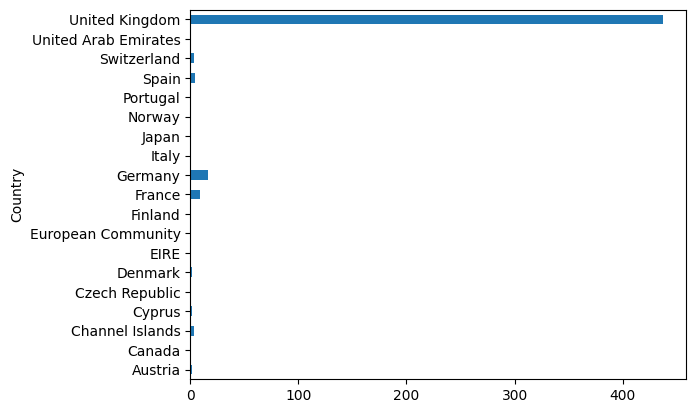

<Axes: ylabel='Country'>

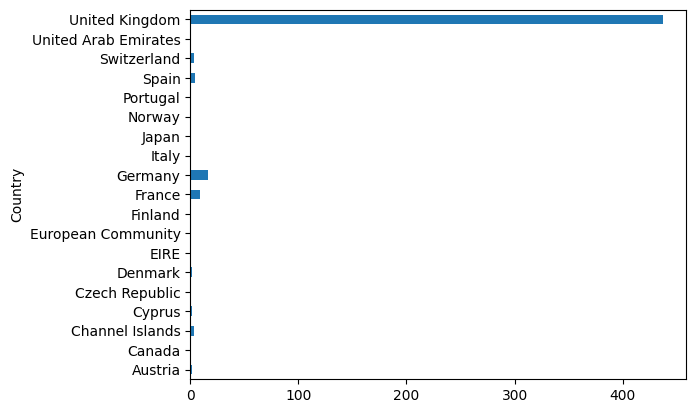

In [43]:
df.groupby('Country')['CustomerID'].nunique().plot.barh()

---
### (Q-07) จงแสดงจำนวน invoice ในแต่ละวันในสัปดาห์ ในรูปกราฟแท่ง

Display the number of invoices in every day of week in a bar chart.

hint
- ลองค้นหาด้วย "pandas dayofweek"
- Try searching by "pandas dayofweek"

In [45]:
df['dow'] = df['InvDate'].dt.dayofweek
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate,hr,dow
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00,9,2
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9,2
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9,2
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00,9,2
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00,9,2


<Axes: xlabel='dow'>

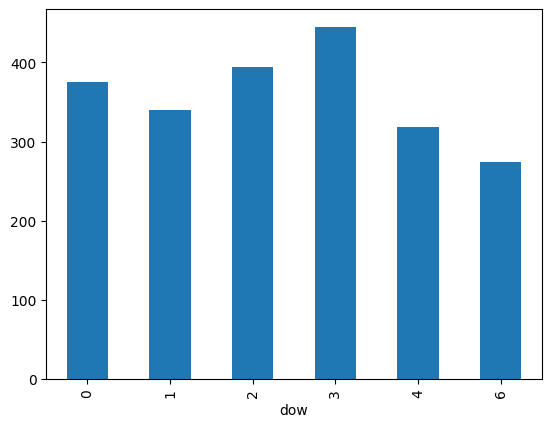

In [46]:
df.groupby('dow')['InvoiceNo'].nunique().plot.bar()

---
### (Q-08) จงแสดงจำนวนรายได้ในแต่ละเดือน ในรูปกราฟแท่ง

Display the number of monthly revenue by a bar chart.

hint
- ลองค้นหาด้วย (google by) "pandas datetime strftime"
- ใช้รูปแบบ (date format) "%Y-%m"

In [49]:
df['YYYYMM'] = df['InvDate'].dt.strftime("%Y-%m")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate,hr,dow,YYYYMM
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00,9,2,2010-12
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9,2,2010-12
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9,2,2010-12
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00,9,2,2010-12
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00,9,2,2010-12


<Axes: xlabel='YYYYMM'>

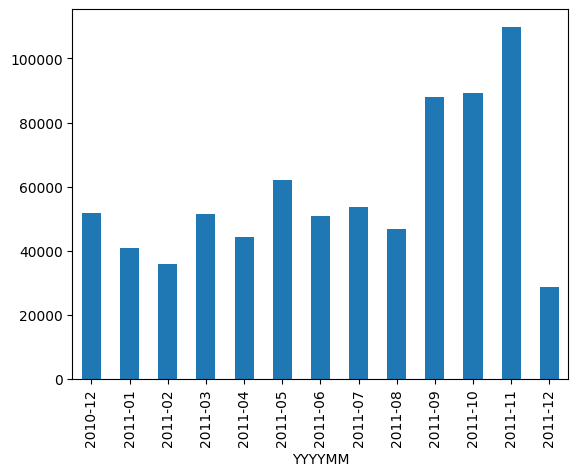

In [50]:
df.groupby('YYYYMM')['Total'].sum().plot.bar()

---
### (Q-09) จงหา top 5 สินค้าใดขายดีในเดือน 12

Which are top-5 products in December?


In [52]:
df['MM'] = df['InvDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate,hr,dow,YYYYMM,MM
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00,9,2,2010-12,12
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9,2,2010-12,12
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9,2,2010-12,12
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00,9,2,2010-12,12
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00,9,2,2010-12,12


In [53]:
df[df['MM']==12].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

,Quantity
Description,
ASSORTED COLOUR BIRD ORNAMENT,386
WORLD WAR 2 GLIDERS ASSTD DESIGNS,339
PAPER CHAIN KIT 50'S CHRISTMAS,323
PAPER CHAIN KIT VINTAGE CHRISTMAS,314
PACK OF 72 RETROSPOT CAKE CASES,298


---
### (Q-10) จงหา top 5 สินค้าประเภทไม้ที่ขายได้ดีในเดือน 12

Which are top-5 wooden products in December?

hint
- มีคำว่า (description contains) "WOODEN"
- ลองค้นหาด้วยคำว่า (google by) "pandas string contains"

In [54]:
df[df['Description'].str.contains('WOODEN')].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

,Quantity
Description,
WOODEN STAR CHRISTMAS SCANDINAVIAN,1088
WOODEN HEART CHRISTMAS SCANDINAVIAN,937
WOODEN FRAME ANTIQUE WHITE,732
WOODEN TREE CHRISTMAS SCANDINAVIAN,683
WOODEN BOX OF DOMINOES,532


---
### (Q-11) สินค้าที่มีคำว่า CHRISTMAS ขายได้ดีที่สุดในเดือนใด

What is the top month that can sell the most products containing "CHRISTMAS"?

In [55]:
df[df['Description'].str.contains('CHRISTMAS')].groupby('MM')['Quantity'].sum().sort_values(ascending=False).head(5)

,Quantity
MM,
11,9086
10,6183
9,4637
12,4176
8,1200


---
### (Q-12) ลูกค้าคนใดบ้างที่ซื้อสินค้าแทบทุกเดือน

Which customers buy every month?

hint
- groupby ลูกค้า, แล้วนับเดือน
- เรียงจากมากไปน้อย
- เลือกลูกค้าที่มีคะแนนสูงสุด (อาจจะมีหลายคน)

hint
- groupby customer, then count unique month-year
- sort from max-to-min
- select customers having top score (may be many customers)

In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate,hr,dow,YYYYMM,MM
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00,9,2,2010-12,12
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9,2,2010-12,12
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9,2,2010-12,12
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00,9,2,2010-12,12
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00,9,2,2010-12,12


In [57]:
df1 = df.groupby('CustomerID')[['YYYYMM']].nunique()
df1

,YYYYMM
CustomerID,
12365.0,1
12370.0,3
12398.0,1
12403.0,1
12405.0,1
...,...
18235.0,3
18248.0,2
18252.0,2


In [58]:
max_month = df1['YYYYMM'].max()
print(max_month)

13


In [59]:
df1[df1['YYYYMM'] == max_month]

,YYYYMM
CustomerID,
13319.0,13
13408.0,13
14606.0,13
14796.0,13
14911.0,13
18109.0,13


---
### (Q-13) จงจัดกลุ่มลูกค้าตามจำนวน invoice และราคาในการซื้อสินค้า ของแต่ละคน

Make groups of customers based on number of invoices and total expense.

hint 😵

In [61]:
df.groupby('CustomerID').agg({'InvoiceNo':'nunique', 'Total':'sum'})


,InvoiceNo,Total
CustomerID,,
12365.0,1,320.69
12370.0,4,3199.13
12398.0,1,1635.66
12403.0,1,427.70
12405.0,1,1710.39
...,...,...
18235.0,3,1796.48
18248.0,2,783.14
18252.0,2,526.67





---
https://rathachai.creatier.pro/

## つづく
